In [2]:
import numpy as np
from pysterior import regression
%matplotlib inline
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

 [-----------------100%-----------------] 7000 of 7000 complete in 14.2 sec

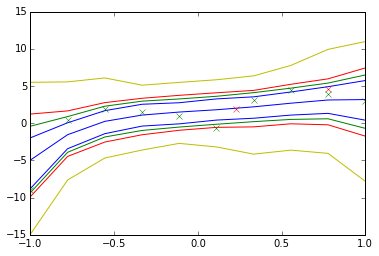

In [3]:
TRUE_ALPHA, TRUE_SIGMA = 1, 1.0
TRUE_BETA1 = 2.5
TRUE_BETA2 = 6.5
TRUE_BETA3 = 2.5
TRUE_BETA4 = -10.5
size = 10
X = np.linspace(-1.0, 1.0, size)
noise = (np.random.randn(size)*TRUE_SIGMA)
y = (TRUE_ALPHA + TRUE_BETA1*X + TRUE_BETA2*X**2 + TRUE_BETA3*X**3  + TRUE_BETA4*X**4 + noise)

holdout_X = np.array([0.23, 0.78])
noise = (np.random.randn(len(holdout_X))*TRUE_SIGMA)
holdout_y = (TRUE_ALPHA + TRUE_BETA1*holdout_X + TRUE_BETA2*holdout_X**2 + TRUE_BETA3*holdout_X**3  + TRUE_BETA4*holdout_X**4 + noise)

lr = regression.PolynomialRegression(degree=4)
lr.fit(X, y, 7000)

for alpha, color in [(0.01, 'y'), (0.05, 'r'), (0.1, 'g'), (0.2, 'b')]:
    intervals = lr.predict_hpd_interval(X, alpha)
    lower_bound, upper_bound = zip(*intervals)
    plt.plot(X, lower_bound, color=color)
    plt.plot(X, upper_bound, color=color)

predicted_line = lr.predict(X)
plt.plot(X, predicted_line)
plt.plot(X, y, linewidth=0.0, marker='x', color='g')
plt.plot(holdout_X, holdout_y, linewidth=0.0, marker='x', color='r')
plt.show()